In [1]:
from deepom.figures import *
from matplotlib_scalebar.scalebar import ScaleBar

data = Images_FigureData.load_figure_data()

data_item = data.data_item
item = data.item
refs = data.refs
inference_item = data.inference_item

scalebar_scale = 130e-9

In [2]:
type(item)

deepom.bionano_compare.AlignmentItem

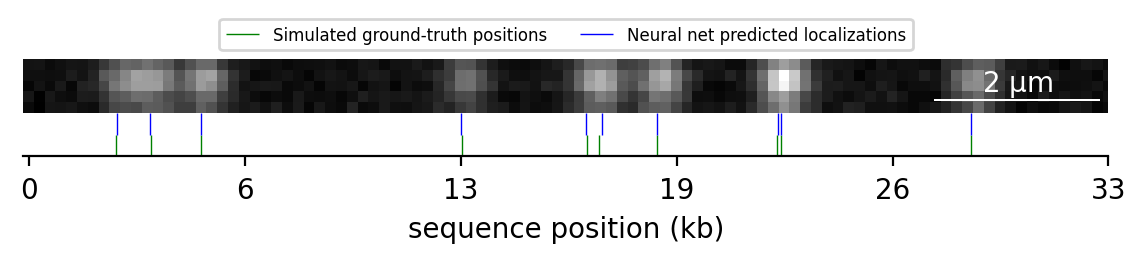

In [14]:
from pathlib import Path

_, axs = pyplot.subplots(figsize=(7, 4), dpi=200, nrows=1)

image = data_item.image[0]
labeled_pos = data_item.labeled_coords.T[1]

pyplot.imshow(image, cmap="gray")
objs = pyplot.eventplot([inference_item.loc_pred - .5, labeled_pos - .5], lineoffsets=[-3.5, -1.5], colors=["g", "b"],
                        linewidths=.5, linelengths=2)
pyplot.legend(objs, ["Simulated ground-truth positions", "Neural net predicted localizations"],
              ncol=3, loc="upper center",
              fontsize=6,
              bbox_to_anchor=(0.5, 1.5)
              )
set_only_x_visible()
set_formatter(lambda x, _: int((x * data_item.scale) / 1000))
pyplot.gca().invert_yaxis()
pyplot.gca().add_artist(
    ScaleBar(scalebar_scale, color="w", box_alpha=0, scale_loc="top", location="upper right", width_fraction=.02,
             sep=0))
pyplot.xlabel("sequence position (kb)")
pyplot.xlim(None, 100)
pyplot.ylim(-4.5, None)

for ext in [".pdf", ".jpg"]:
    pyplot.savefig(Path("../../DeepOM-Paper/figures") / ("simulation_figure" + ext), bbox_inches='tight')